<a href="https://colab.research.google.com/github/angeellogabriel/Codigos_SINDyAE/blob/main/Simula_MIT_Adaptacao_de_matlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
V = 230
rs = 0.5673
rr = 0.7091
XM = 23.6370
J = 0.025284
B = 0.005
TL = 0
pi = np.pi
Wb = 2*pi*60
P = 4
Lls=0.00301
Llr=0.00301
LM = XM/Wb
Lss = Lls + LM
Lrr = Llr + LM
D = Lss*Lrr-(LM**2)
h = 1e-5
Tfinal = 1
n = round(Tfinal/h)


In [ ]:
psi_qs = np.zeros(n)
psi_ds = np.zeros(n)
psi_qr = np.zeros(n)
psi_dr = np.zeros(n)
Wrm = np.zeros(n)
ws = 314

i_qs = np.zeros(n)
i_ds = np.zeros(n)
i_qr = np.zeros(n)
i_dr = np.zeros(n)
Wr = np.zeros(n)
Tem = np.zeros(n)

i_as = np.zeros(n)
i_bs = np.zeros(n)
i_cs = np.zeros(n)

i_ar = np.zeros(n)
i_br = np.zeros(n)
i_cr = np.zeros(n)

va = np.zeros(n)
vb = np.zeros(n)
vc = np.zeros(n)

th = np.zeros(n)

v_qs = np.zeros(n)
v_ds = np.zeros(n)
v_qr = np.zeros(n)
v_dr = np.zeros(n)

TL = np.zeros(n)
p = np.zeros(n)

In [ ]:
time=0
k = np.zeros(n)

for i in np.arange(2,n):
  time=time+h;

  # Entrada trifásica:
  va[i] = V*np.sqrt(2/3)*np.cos(Wb*time)
  vb[i] = V*np.sqrt(2/3)*np.cos(Wb*time-2*pi/3)
  vc[i] = V*np.sqrt(2/3)*np.cos(Wb*time+2*pi/3)

  # Entrada vdq - Girante:
  v_ds[i] = 2/3*((va[i]*np.cos(Wb*time))+(vb[i]*np.cos(Wb*time-(2*pi/3)))+(vc[i]*np.cos(Wb*time+(2*pi/3))))
  v_qs[i] = 2/3*((va[i]*np.sin(Wb*time))+(vb[i]*np.sin(Wb*time-(2*pi/3)))+(vc[i]*np.sin(Wb*time+(2*pi/3))))

  kfds1 = h*(v_ds[i-1]-(rs*i_ds[i-1]))
  kfqs1 = h*(v_qs[i-1]-(rs*i_qs[i-1]))
  kfdr1 = h*(v_dr[i-1]-(rr*i_dr[i-1])-(Wr[i-1]*psi_qr[i-1]))
  kfqr1 = h*(v_qr[i-1]-(rr*i_qr[i-1])+(Wr[i-1]*psi_dr[i-1]))
  kWr1=h*(Tem[i-1]-B*Wr[i-1])/J
  kfds2 =h*((v_ds[i-1]-(rs*i_ds[i-1]))+(0.5*kfds1))
  kfqs2 =h*((v_qs[i-1]-(rs*i_qs[i-1]))+(0.5*kfqs1))
  kfdr2 =h*((v_dr[i-1]-(rr*i_dr[i-1])-(Wr[i-1]*psi_qr[i-1]))+0.5*kfdr1)
  kfqr2 =h*((v_qr[i-1]-(rr*i_qr[i-1])+(Wr[i-1]*psi_dr[i-1]))+0.5*kfqr1)
  kWr2 = h*(((Tem[i-1]-TL[i-1]-B*Wr[i-1])/J)+(0.5*kWr1))
  kfds3 =h*((v_ds[i-1]-(rs*i_ds[i-1]))+(0.5*kfds2))
  kfqs3 = h*((v_qs[i-1]-(rs*i_qs[i-1]))+(0.5*kfqs2))
  kfdr3 =h*((v_dr[i-1]-(rr*i_dr[i-1])-(Wr[i-1]*psi_qr[i-1]))+(0.5*kfdr2))
  kfqr3 = h*((v_qr[i-1]-(rr*i_qr[i-1])+(Wr[i-1]*psi_dr[i-1]))+(0.5*kfqr2))
  kWr3 =h*(((Tem[i-1]-TL[i-1]-B*Wr[i-1])/J)+(0.5*kWr2))
  kfds4 =h*((v_ds[i-1]-(rs*i_ds[i-1]))+(0.5*kfds3))
  kfqs4 = h*((v_qs[i-1]-(rs*i_qs[i-1]))+(0.5*kfqs3))
  kfdr4 =h*((v_dr[i-1]-(rr*i_dr[i-1])-(Wr[i-1]*psi_qr[i-1]))+(0.5*kfdr3))
  kfqr4 = h*((v_qr[i-1]-(rr*i_qr[i-1])+(Wr[i-1]*psi_dr[i-1]))+(0.5*kfqr3))
  kWr4 =h*(((Tem[i-1]-TL[i-1]-B*Wr[i-1])/J)+(0.5*kWr3))

  psi_ds[i] = psi_ds[i-1]+(1/6)*(kfds1 + 2*kfds2 + 2*kfds3 + kfds4)
  psi_qs[i] = psi_qs[i-1]+(1/6)*(kfqs1 + 2*kfqs2 + 2*kfqs3 + kfqs4)
  psi_dr[i] = psi_dr[i-1]+(1/6) * (kfdr1 + 2*kfdr2 + 2*kfdr3 + kfdr4)
  psi_qr[i] = psi_qr[i-1]+(1/6) * (kfqr1 + 2*kfqr2 + 2*kfqr3 + kfqr4)
  Wr[i] = Wr[i-1]+(1/6) * (kWr1+ 2*kWr2+ 2*kWr3 + kWr4)

  i_ds[i]=(Lrr*psi_ds[i]-(LM*psi_dr[i]))/D
  i_qs[i]=(Lrr*psi_qs[i]-(LM*psi_qr[i]))/D
  i_dr[i]=(Lss*psi_dr[i]-(LM*psi_ds[i]))/D
  i_qr[i]=(Lss*psi_qr[i]-(LM*psi_qs[i]))/D
  Tem[i]= (P/2)*(psi_qr[i]*i_dr[i]-psi_dr[i]*i_qr[i]);

  # Integração das equações do fluxo - Euler:
  # psi_ds[i] = psi_ds[i-1] + (h*(v_ds[i-1]-rs*i_ds[i-1]+ws*psi_qs[i-1]));
  #psi_qs[i] = psi_qs[i-1] + (h*(v_qs[i-1]-rs*i_qs[i-1]-ws*psi_ds[i-1]));
  #psi_dr[i] = psi_dr[i-1] + (h*((v_dr[i-1]-rr*i_dr[i-1]+((ws-Wr[i-1])*psi_qr[i-1]))));
  #psi_qr[i] = psi_qr[i-1] + (h*((v_qr[i-1]-rr*i_qr[i-1])-((ws-Wr[i-1])*psi_dr[i-1])));
  #Wrm[i]    = Wrm[i-1] + (h*((Tem[i-1]-B*Wr[i-1])/(J)));


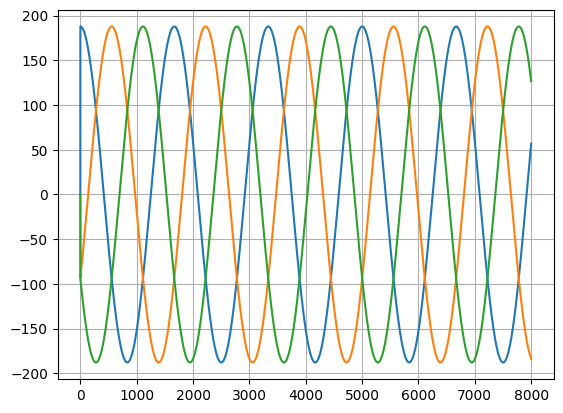

In [ ]:
plt.plot(figsize=(2,10))
plt.plot(va[0:8000])
plt.plot(vb[0:8000])
plt.plot(vc[0:8000])
plt.grid()
plt.show()

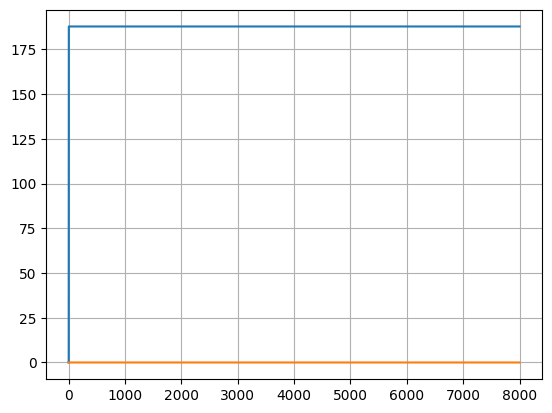

In [ ]:
plt.plot(figsize=(2,10))
plt.plot(v_ds[0:8000])
plt.plot(v_qs[0:8000])
plt.grid()
plt.show()

<ipython-input-82-aacd4aecaaa6>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


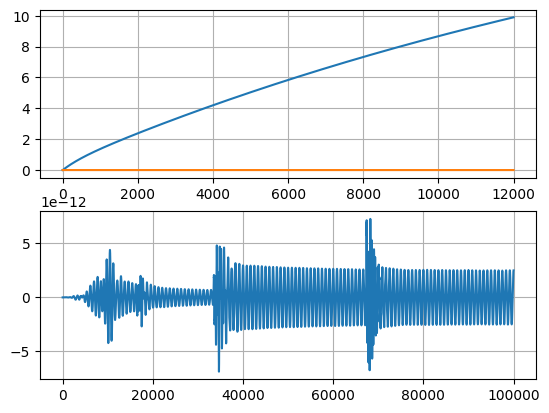

In [ ]:
plt.plot(figsize=(2,10))
plt.subplot(211)
plt.plot(psi_ds[0:12000])
plt.plot(psi_qs[0:12000])
plt.grid()
plt.subplot(212)
plt.plot(Tem)
plt.grid()
plt.show()